you're playing a game with iid uniform variables. the game continues as long as the variables are monotonically decreasing, it stops when you get x(t) > x(t-1). what's the expected stopping time for the game?

Text(0, 0.5, 'Cumulative average')

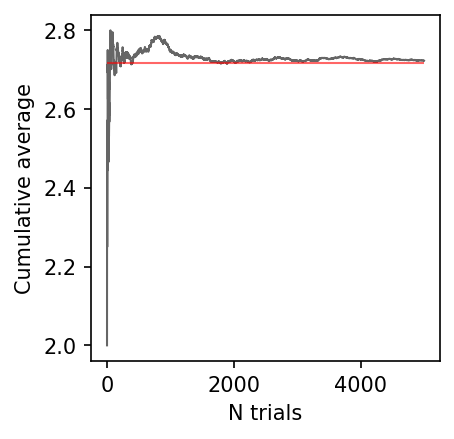

In [97]:
import numpy as np
import matplotlib.pyplot as plt
import itertools as it

seq = (np.random.rand() for _ in it.count())

def seq():
    x = 0
    while True:
        xi = np.random.rand()
        if xi > x:
            x = xi
            yield xi
        else:
            break
Nruns = 5000
trials = [len(list(seq()))+1 for _ in range(Nruns)]
running_average = np.cumsum(trials) / np.arange(1, Nruns + 1)
fig,ax = plt.subplots(1,1, figsize=(3,3), dpi=150)
ax.plot(running_average, 'k-', lw=1, alpha=0.6)
ax.hlines(np.exp(1), 0, Nruns, color='r', lw=1, alpha=0.6)
ax.set_xlabel('N trials')
ax.set_ylabel('Cumulative average')

you're playing a game with a fair coin. a head gets you +1, getting tails takes away -2 from the pot. at the end you get what's in the pot and you pay if its negative. rolling HHH ends the game and adds +8. how much would you pay to play the game?

In [ ]:
import itertools
import functools
import operator
import collections

def coin_flips():
    coin_flip_seq = ( 'H' if np.random.rand() > 0.5 else 'T' for _ in itertools.count() )
    return coin_flip_seq

# return predicate that returns False on the nth head in a row, True otherwise
def pred_heads(n):
    nheads = 0
    def pred(x):
        nonlocal nheads
        if nheads >= n:
            return False
        if x == 'H':
            nheads += 1
            return True
        else:
            nheads = 0
            return True
    return pred

# return score of sequence each head makes hstep each tails makes tstep you get end_step at the end
def compute_outcome(g, hstep, tstep, end_step):
    return sum((hstep if x == 'H' else tstep for x in g)) + end_step

Nruns = 200000
outcomes = [compute_outcome(itertools.takewhile(pred_heads(3), coin_flips()), 1, -2, 8) for _ in range(Nruns)]
mean = sum(outcomes)/Nruns
std = sum((oci - mean)**2 for oci in outcomes)**0.5/Nruns

print(f"mean return = {mean}, standard deviation = {std}")